<a href="https://colab.research.google.com/github/YesidCastelblanco/Taller_2_analisis_univariado/blob/main/Taller_Analisis_Univariado_Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **Taller Analisis Univariado**


---

La visualización de datos univariados es una técnica fundamental en el análisis de datos que se centra en la representación e interpretación de una sola variable a la vez.


---


**VARIABLE OBJETIVO**

Nuestra variable objetivo es la Mora, esto debido a un problema que se evidencia en una entidad financiera donde hay gran cantidad de cartera castigada lo cual ha venido incrementando año tras año y se desea conocer que variables influyen en ese comportamiento.


---



In [2]:
# Importamos las bibliotecas necesarias

# Biblioteca para manipulación y análisis de datos estructurados
import pandas as pd

# Biblioteca para cálculos numéricos y manipulación de datos
import numpy as np

# Biblioteca para la creación de gráficos básicos y visualizaciones de datos
import matplotlib.pyplot as plt

# Proporciona una interfaz de alto nivel para crear gráficos estadísticos y más complejos
import seaborn as sns

# útiles para evaluar el rendimiento de un modelo de clasificación
from sklearn.metrics import accuracy_score, confusion_matrix

# Modelo lineal de regresión logística que se utiliza para predecir la probabilidad de una clase o evento en función de una o más variables independientes
from sklearn.linear_model import LogisticRegression

# se utiliza para dividir un conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split


In [3]:
# Leer un archivo CSV y cargarlo en un DataFrame de Pandas

df = pd.read_csv('https://raw.githubusercontent.com/YesidCastelblanco/Dataset_clientes_mora/main/Dataset_mora.csv')


In [4]:
# Definimos los encabezados del Dataset

headers = ["SEXO","ESTADO_CIVIL","VIVIENDA","EDAD","INGRESOS","EGRESOS","DEPENDIENTES","PLAZO","SALDO_CREDITO","MORA","CLASIFICACION_MORA"]

df.columns = headers

print(df)

       SEXO  ESTADO_CIVIL  VIVIENDA  EDAD   INGRESOS   EGRESOS  DEPENDIENTES  \
0     MUJER       SOLTERO  FAMILIAR    47    4966896   4000000             0   
1    HOMBRE        CASADO    PROPIA    33   16213150   2000000             0   
2     MUJER       SOLTERO  FAMILIAR    43    1342547     12908             0   
3    HOMBRE  UNION LIBRE   FAMILIAR    54    3106656  18717162             0   
4    HOMBRE       SOLTERO  FAMILIAR    31  200000000   2000000             1   
..      ...           ...       ...   ...        ...       ...           ...   
591   MUJER       SOLTERO  FAMILIAR    65    3094027    310000             0   
592  HOMBRE       SOLTERO  FAMILIAR    33    2010394    723341             0   
593   MUJER       SOLTERO  FAMILIAR    50    1791871    988381             0   
594  HOMBRE       SOLTERO  FAMILIAR    35    2153146   1084469             0   
595  HOMBRE       SOLTERO    PROPIA    31    1977665   1173382             0   

     PLAZO  SALDO_CREDITO  MORA CLASIFI

In [ ]:
# Mostrar DataFrame

df

,SEXO,ESTADO_CIVIL,VIVIENDA,EDAD,INGRESOS,EGRESOS,DEPENDIENTES,PLAZO,SALDO_CREDITO,MORA,CLASIFICACION_MORA
0,MUJER,SOLTERO,FAMILIAR,47,4966896,4000000,0,72,41220000,481,D
1,HOMBRE,CASADO,PROPIA,33,16213150,2000000,0,72,198900000,24,A
2,MUJER,SOLTERO,FAMILIAR,43,1342547,12908,0,122,44300000,555,E
3,HOMBRE,UNION LIBRE,FAMILIAR,54,3106656,18717162,0,61,308081700,53,D
4,HOMBRE,SOLTERO,FAMILIAR,31,200000000,2000000,1,60,121120000,22,A
...,...,...,...,...,...,...,...,...,...,...,...
591,MUJER,SOLTERO,FAMILIAR,65,3094027,310000,0,60,27000000,475,E
592,HOMBRE,SOLTERO,FAMILIAR,33,2010394,723341,0,140,59700000,158,D
593,MUJER,SOLTERO,FAMILIAR,50,1791871,988381,0,140,57000000,67,B
594,HOMBRE,SOLTERO,FAMILIAR,35,2153146,1084469,0,140,75000000,614,E


In [ ]:
# Consultamos los tipos de datos de las variables en el DataFrame para poder decidir métodos adecuados para la visualización de los datos mediante analisis univariado

df.dtypes

# Int64 = Tipo de dato entero de 64 bits
# Object = Datos de texto, cadenas de caracteres, datos mixtos

,0
SEXO,object
ESTADO_CIVIL,object
VIVIENDA,object
EDAD,int64
INGRESOS,int64
EGRESOS,int64
DEPENDIENTES,int64
PLAZO,int64
SALDO_CREDITO,int64
MORA,int64


In [6]:
# Visualizar las primeras filas del conjunto de datos

print("Primeras filas del conjunto de datos:")
df.head(10)

Primeras filas del conjunto de datos:


,SEXO,ESTADO_CIVIL,VIVIENDA,EDAD,INGRESOS,EGRESOS,DEPENDIENTES,PLAZO,SALDO_CREDITO,MORA,CLASIFICACION_MORA
0,MUJER,SOLTERO,FAMILIAR,47,4966896,4000000,0,72,41220000,481,D
1,HOMBRE,CASADO,PROPIA,33,16213150,2000000,0,72,198900000,24,A
2,MUJER,SOLTERO,FAMILIAR,43,1342547,12908,0,122,44300000,555,E
3,HOMBRE,UNION LIBRE,FAMILIAR,54,3106656,18717162,0,61,308081700,53,D
4,HOMBRE,SOLTERO,FAMILIAR,31,200000000,2000000,1,60,121120000,22,A
5,HOMBRE,CASADO,PROPIA,46,7640000,4500000,0,48,35300000,480,E
6,HOMBRE,UNION LIBRE,FAMILIAR,37,2266188,1163135,0,140,73100000,433,E
7,HOMBRE,SOLTERO,PROPIA,47,4247963,2053349,1,140,200000000,36,A
8,HOMBRE,CASADO,PROPIA,63,761428,201322,0,60,23965000,204,E
9,HOMBRE,CASADO,PROPIA,72,3539425,1969776,0,60,12147000,449,E


In [7]:
# Visualizar las últimas filas del conjunto de datos

print("Ultimas filas del conjunto de datos:")
df.tail(10)

Ultimas filas del conjunto de datos:


,SEXO,ESTADO_CIVIL,VIVIENDA,EDAD,INGRESOS,EGRESOS,DEPENDIENTES,PLAZO,SALDO_CREDITO,MORA,CLASIFICACION_MORA
586,HOMBRE,SOLTERO,FAMILIAR,38,2306507,791406,0,120,79500000,463,E
587,MUJER,SOLTERO,PROPIA,60,1069192,352448,0,120,48000000,36,A
588,MUJER,SEPARADO,FAMILIAR,60,2425592,1332126,0,140,102000000,341,E
589,MUJER,CASADO,PROPIA,48,3480000,31360000,0,72,168000000,80,D
590,MUJER,SOLTERO,FAMILIAR,52,2671586,967636,0,120,50000000,645,E
591,MUJER,SOLTERO,FAMILIAR,65,3094027,310000,0,60,27000000,475,E
592,HOMBRE,SOLTERO,FAMILIAR,33,2010394,723341,0,140,59700000,158,D
593,MUJER,SOLTERO,FAMILIAR,50,1791871,988381,0,140,57000000,67,B
594,HOMBRE,SOLTERO,FAMILIAR,35,2153146,1084469,0,140,75000000,614,E
595,HOMBRE,SOLTERO,PROPIA,31,1977665,1173382,0,140,51500000,280,E


In [8]:
# Mostrar caracteristicas estadísticas de los datos en un DataFrame para identificar anomalias o patrones

df.describe()

# count: Número de valores no nulos en la columna
# mean: Media de los valores en la columna
# std: Desviación estándar de los valores en la columna
# min: Valor mínimo en la columna
# 25%: Primer cuartil (25th percentile)
# 50%: Mediana (50th percentile)
# 75%: Tercer cuartil (75th percentile)
# max: Valor máximo en la columna

# unique: valores unicos
# top: valores mas comunes, los que mas se repiten
# freq: frecuencia de los valores mas comunes


,EDAD,INGRESOS,EGRESOS,DEPENDIENTES,PLAZO,SALDO_CREDITO,MORA
count,596.000000,5.960000e+02,5.960000e+02,596.000000,596.000000,5.960000e+02,596.000000
mean,45.573826,1.573884e+07,9.379276e+06,0.362416,95.771812,7.155391e+07,287.793624
std,12.503831,1.476983e+08,7.207173e+07,4.389008,39.814844,1.714423e+08,268.505154
min,14.000000,0.000000e+00,0.000000e+00,0.000000,18.000000,1.966634e+06,1.000000
25%,36.000000,1.559405e+06,5.116410e+05,0.000000,60.000000,3.000000e+07,36.000000
50%,43.000000,2.137788e+06,1.000000e+06,0.000000,74.500000,5.548337e+07,218.000000
75%,53.000000,3.499719e+06,1.527788e+06,0.000000,140.000000,7.807500e+07,494.000000
max,83.000000,2.764298e+09,1.183283e+09,99.000000,225.000000,4.000000e+09,934.000000


In [ ]:
# Obtener información sobre dimensiones de un DataFrame, es deci, número de columnas * número de filas

df.shape

# (filas, columnas)


(596, 11)

In [ ]:
# Visión del Dataframe útil para depuración y comprensión inicial de los datos
# Podemos consultar tipo de datos y cantidad de registros sin datos nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SEXO                596 non-null    object
 1   ESTADO_CIVIL        595 non-null    object
 2   VIVIENDA            592 non-null    object
 3   EDAD                596 non-null    int64 
 4   INGRESOS            596 non-null    int64 
 5   EGRESOS             596 non-null    int64 
 6   DEPENDIENTES        596 non-null    int64 
 7   PLAZO               596 non-null    int64 
 8   SALDO_CREDITO       596 non-null    int64 
 9   MORA                596 non-null    int64 
 10  CLASIFICACION_MORA  596 non-null    object
dtypes: int64(7), object(4)
memory usage: 51.3+ KB


In [ ]:
# Análisis Cantidad de clientes por dias de mora

print(df['MORA'].value_counts())


MORA
5      65
36     22
767    14
97     14
433    13
       ..
251     1
60      1
471     1
805     1
475     1
Name: count, Length: 237, dtype: int64




---


*Creación de campo CATEGORIA*


---



In [9]:
# Crea una nueva columna ' CATEGORIA' y se asignamos una categoria de acuerdo con un rango
# pd.cut: Es una función de pandas utilizada para segmentar y clasificar valores en categorías basadas en intervalos especificados
# bins=[-np.inf (menos infinito), 1.000.000, 3.000.000, np.inf(mas infinito)]: Estos son los límites de los intervalos en los que se dividen los datos de la columna
# -np.inf (menos infinito) hasta 1.000.000 define el primer intervalo
# mayores de 1.000.000 hasta 3.000.000 define el segundo intervalo.
# mayores de 3.000.000 hasta np.inf (más infinito) define el tercer intervalo.
# labels=['Baja', 'Media', 'Alta']

df['CATEGORIA_INGRESOS'] = pd.cut(df['INGRESOS'], bins=[-np.inf, 1000000, 3000000, np.inf], labels=['Bajo', 'Medio', 'Alto'])

# Muestra el DataFrame con la nueva columna
print(df)

       SEXO  ESTADO_CIVIL  VIVIENDA  EDAD   INGRESOS   EGRESOS  DEPENDIENTES  \
0     MUJER       SOLTERO  FAMILIAR    47    4966896   4000000             0   
1    HOMBRE        CASADO    PROPIA    33   16213150   2000000             0   
2     MUJER       SOLTERO  FAMILIAR    43    1342547     12908             0   
3    HOMBRE  UNION LIBRE   FAMILIAR    54    3106656  18717162             0   
4    HOMBRE       SOLTERO  FAMILIAR    31  200000000   2000000             1   
..      ...           ...       ...   ...        ...       ...           ...   
591   MUJER       SOLTERO  FAMILIAR    65    3094027    310000             0   
592  HOMBRE       SOLTERO  FAMILIAR    33    2010394    723341             0   
593   MUJER       SOLTERO  FAMILIAR    50    1791871    988381             0   
594  HOMBRE       SOLTERO  FAMILIAR    35    2153146   1084469             0   
595  HOMBRE       SOLTERO    PROPIA    31    1977665   1173382             0   

     PLAZO  SALDO_CREDITO  MORA CLASIFI

In [10]:
df['CATEGORIA_PLAZO'] = pd.cut(df['PLAZO'], bins=[-np.inf, 24, 60, np.inf], labels=['plazo bajo', 'plazo medio', 'plazo alto'])

# Muestra el DataFrame con la nueva columna
print(df)

       SEXO  ESTADO_CIVIL  VIVIENDA  EDAD   INGRESOS   EGRESOS  DEPENDIENTES  \
0     MUJER       SOLTERO  FAMILIAR    47    4966896   4000000             0   
1    HOMBRE        CASADO    PROPIA    33   16213150   2000000             0   
2     MUJER       SOLTERO  FAMILIAR    43    1342547     12908             0   
3    HOMBRE  UNION LIBRE   FAMILIAR    54    3106656  18717162             0   
4    HOMBRE       SOLTERO  FAMILIAR    31  200000000   2000000             1   
..      ...           ...       ...   ...        ...       ...           ...   
591   MUJER       SOLTERO  FAMILIAR    65    3094027    310000             0   
592  HOMBRE       SOLTERO  FAMILIAR    33    2010394    723341             0   
593   MUJER       SOLTERO  FAMILIAR    50    1791871    988381             0   
594  HOMBRE       SOLTERO  FAMILIAR    35    2153146   1084469             0   
595  HOMBRE       SOLTERO    PROPIA    31    1977665   1173382             0   

     PLAZO  SALDO_CREDITO  MORA CLASIFI

In [11]:
df['CATEGORIA_EDAD'] = pd.cut(df['EDAD'], bins=[-np.inf, 30, 60, np.inf], labels=['primera edad', 'segunda edad', 'tercera edad'])

# Muestra el DataFrame con la nueva columna
print(df)


       SEXO  ESTADO_CIVIL  VIVIENDA  EDAD   INGRESOS   EGRESOS  DEPENDIENTES  \
0     MUJER       SOLTERO  FAMILIAR    47    4966896   4000000             0   
1    HOMBRE        CASADO    PROPIA    33   16213150   2000000             0   
2     MUJER       SOLTERO  FAMILIAR    43    1342547     12908             0   
3    HOMBRE  UNION LIBRE   FAMILIAR    54    3106656  18717162             0   
4    HOMBRE       SOLTERO  FAMILIAR    31  200000000   2000000             1   
..      ...           ...       ...   ...        ...       ...           ...   
591   MUJER       SOLTERO  FAMILIAR    65    3094027    310000             0   
592  HOMBRE       SOLTERO  FAMILIAR    33    2010394    723341             0   
593   MUJER       SOLTERO  FAMILIAR    50    1791871    988381             0   
594  HOMBRE       SOLTERO  FAMILIAR    35    2153146   1084469             0   
595  HOMBRE       SOLTERO    PROPIA    31    1977665   1173382             0   

     PLAZO  SALDO_CREDITO  MORA CLASIFI

In [12]:
df['CATEGORIA_EGRESOS'] = pd.cut(df['EGRESOS'], bins=[-np.inf, 1000000, 3000000, np.inf], labels=['Bajo', 'Medio', 'Alto'])

# Muestra el DataFrame con la nueva columna
print(df)

       SEXO  ESTADO_CIVIL  VIVIENDA  EDAD   INGRESOS   EGRESOS  DEPENDIENTES  \
0     MUJER       SOLTERO  FAMILIAR    47    4966896   4000000             0   
1    HOMBRE        CASADO    PROPIA    33   16213150   2000000             0   
2     MUJER       SOLTERO  FAMILIAR    43    1342547     12908             0   
3    HOMBRE  UNION LIBRE   FAMILIAR    54    3106656  18717162             0   
4    HOMBRE       SOLTERO  FAMILIAR    31  200000000   2000000             1   
..      ...           ...       ...   ...        ...       ...           ...   
591   MUJER       SOLTERO  FAMILIAR    65    3094027    310000             0   
592  HOMBRE       SOLTERO  FAMILIAR    33    2010394    723341             0   
593   MUJER       SOLTERO  FAMILIAR    50    1791871    988381             0   
594  HOMBRE       SOLTERO  FAMILIAR    35    2153146   1084469             0   
595  HOMBRE       SOLTERO    PROPIA    31    1977665   1173382             0   

     PLAZO  SALDO_CREDITO  MORA CLASIFI

In [13]:
df['CATEGORIA_SALDO'] = pd.cut(df['SALDO_CREDITO'], bins=[-np.inf, 10000000, 50000000, np.inf], labels=['saldo_bajo', 'saldo_medio', 'saldo_alto'])

# Muestra el DataFrame con la nueva columna
print(df)

       SEXO  ESTADO_CIVIL  VIVIENDA  EDAD   INGRESOS   EGRESOS  DEPENDIENTES  \
0     MUJER       SOLTERO  FAMILIAR    47    4966896   4000000             0   
1    HOMBRE        CASADO    PROPIA    33   16213150   2000000             0   
2     MUJER       SOLTERO  FAMILIAR    43    1342547     12908             0   
3    HOMBRE  UNION LIBRE   FAMILIAR    54    3106656  18717162             0   
4    HOMBRE       SOLTERO  FAMILIAR    31  200000000   2000000             1   
..      ...           ...       ...   ...        ...       ...           ...   
591   MUJER       SOLTERO  FAMILIAR    65    3094027    310000             0   
592  HOMBRE       SOLTERO  FAMILIAR    33    2010394    723341             0   
593   MUJER       SOLTERO  FAMILIAR    50    1791871    988381             0   
594  HOMBRE       SOLTERO  FAMILIAR    35    2153146   1084469             0   
595  HOMBRE       SOLTERO    PROPIA    31    1977665   1173382             0   

     PLAZO  SALDO_CREDITO  MORA CLASIFI

In [14]:
df['CATEGORIA_MORA'] = pd.cut(df['MORA'], bins=[-np.inf, 100, 300, np.inf], labels=['mora_baja', 'mora_media', 'mora_alta'])

# Muestra el DataFrame con la nueva columna
print(df)

       SEXO  ESTADO_CIVIL  VIVIENDA  EDAD   INGRESOS   EGRESOS  DEPENDIENTES  \
0     MUJER       SOLTERO  FAMILIAR    47    4966896   4000000             0   
1    HOMBRE        CASADO    PROPIA    33   16213150   2000000             0   
2     MUJER       SOLTERO  FAMILIAR    43    1342547     12908             0   
3    HOMBRE  UNION LIBRE   FAMILIAR    54    3106656  18717162             0   
4    HOMBRE       SOLTERO  FAMILIAR    31  200000000   2000000             1   
..      ...           ...       ...   ...        ...       ...           ...   
591   MUJER       SOLTERO  FAMILIAR    65    3094027    310000             0   
592  HOMBRE       SOLTERO  FAMILIAR    33    2010394    723341             0   
593   MUJER       SOLTERO  FAMILIAR    50    1791871    988381             0   
594  HOMBRE       SOLTERO  FAMILIAR    35    2153146   1084469             0   
595  HOMBRE       SOLTERO    PROPIA    31    1977665   1173382             0   

     PLAZO  SALDO_CREDITO  MORA CLASIFI

# LIMPIEZA DE LOS DATOS

---

Ajustamos los campos de INGRESO y EGRESO con valor en 0, asignamos la media

---


In [15]:
# Calculamos el valor de la media de los campos INGRESOS y EGRESOS excluyendo los valores en 0

INGRESOS_mean = df['INGRESOS'][df['INGRESOS'] != 0].mean()
EGRESOS_mean = df['EGRESOS'][df['EGRESOS'] != 0].mean()

# Reemplazamos los valores en 0 en la variable 'INGRESOS' por la media calculada

df['INGRESOS'] = df['INGRESOS'].replace(0, INGRESOS_mean)

# Reemplazamos los valores en 0 en la variable 'EGRESOS' por la media calculada
df['EGRESOS'] = df['EGRESOS'].replace(0, EGRESOS_mean)

# Verificamos los cambios realizados
print(df['INGRESOS'].describe())
print(df['EGRESOS'].describe())

count    5.960000e+02
mean     1.657305e+07
std      1.476538e+08
min      1.000000e+00
25%      1.714274e+06
50%      2.232956e+06
75%      4.000036e+06
max      2.764298e+09
Name: INGRESOS, dtype: float64
count    5.960000e+02
mean     9.688126e+06
std      7.205159e+07
min      1.000000e+00
25%      6.050978e+05
50%      1.026809e+06
75%      1.657893e+06
max      1.183283e+09
Name: EGRESOS, dtype: float64


In [16]:
#  identificar y contar la cantidad de valores faltantes (NaN o None) en el DataFrame df

df.isna().sum()


,0
SEXO,0
ESTADO_CIVIL,1
VIVIENDA,4
EDAD,0
INGRESOS,0
EGRESOS,0
DEPENDIENTES,0
PLAZO,0
SALDO_CREDITO,0
MORA,0


In [17]:
# suma de valores faltantes de todas las columnas

df.isna().sum().sum()

5

In [18]:
# elimina todas las filas del DataFrame df que tienen al menos un valor faltante (NaN)

df_clean=df.dropna()

In [19]:
# verificar la cantidad de valores faltantes (NaN o None) en cada columna del DataFrame

df_clean.isna().sum()

,0
SEXO,0
ESTADO_CIVIL,0
VIVIENDA,0
EDAD,0
INGRESOS,0
EGRESOS,0
DEPENDIENTES,0
PLAZO,0
SALDO_CREDITO,0
MORA,0




---


# *VISUALIZACION DE VARIABLES CATEGORICAS*


---



**Para nuestras variables categoricas, vamos a utilizar el gráfico de barras y gráfico circuit o pastel**

En nuestro dataset tenemos las siguientes variables categóricas:



1.   Sexo
2.   Estado civil
3.   Tipo de vivienda
4.   Clasificación de mora

Utilizamos graficas a nuestras variables categoricas para visualizar la distribución y frecuencia con el fin de identificar patrones predominantes o desequilibrios en los datos, igualmente, identificar valores atípicos.



In [ ]:
# Sexo del cliente

# Con este método obtenemos la distribución relativa de los valores unicos de la columna SEXO, muestra su proporción

df_sexo= df_clean.SEXO.value_counts(normalize=True)
print(df_sexo)


SEXO
HOMBRE    0.722504
MUJER     0.277496
Name: proportion, dtype: float64


El 72.25% de los registros del df. corresponden a un cliente HOMBRE

El 27.74% de los registros del df. corresponden a un cliente MUJER

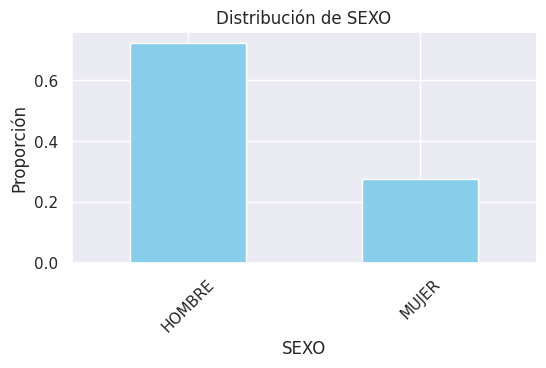

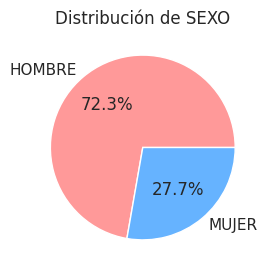

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(6, 3))
df_sexo.plot(kind='bar', color='skyblue')
plt.title('Distribución de SEXO')
plt.xlabel('SEXO')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.show()

# Crear un gráfico de pastel
plt.figure(figsize=(5, 3))
df_sexo.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Distribución de SEXO')
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.show()




---


***Crear múltiples gráficos en una sola figura***


---



*DISTRIBUCIÓN RELATIVA DE LOS VALORES UNICOS*



Con este método obtenemos la distribución relativa de los valores unicos de las variables numéricas que fueron categorizadas para una mejor visualización y entendimiento.




In [ ]:
df_sexo= df_clean.SEXO.value_counts(normalize=True)
print(df_sexo)

df_vivienda= df_clean.VIVIENDA.value_counts(normalize=True)
print(df_vivienda)

df_estado_civil= df_clean.ESTADO_CIVIL.value_counts(normalize=True)
print(df_estado_civil)

df_clasificacion_mora= df_clean.CLASIFICACION_MORA.value_counts(normalize=True)
print(df_clasificacion_mora)

SEXO
HOMBRE    0.722504
MUJER     0.277496
Name: proportion, dtype: float64
VIVIENDA
FAMILIAR     0.526227
PROPIA       0.417936
ARRENDADA    0.055838
Name: proportion, dtype: float64
ESTADO_CIVIL
SOLTERO         0.455161
CASADO          0.348562
UNION LIBRE     0.123519
SEPARADO        0.040609
VIUDO           0.020305
RELIGIOSO       0.010152
DIVORCIADO      0.001692
Name: proportion, dtype: float64
CLASIFICACION_MORA
E     0.507614
A     0.233503
D     0.147208
C     0.054146
B     0.047377
EE    0.010152
Name: proportion, dtype: float64


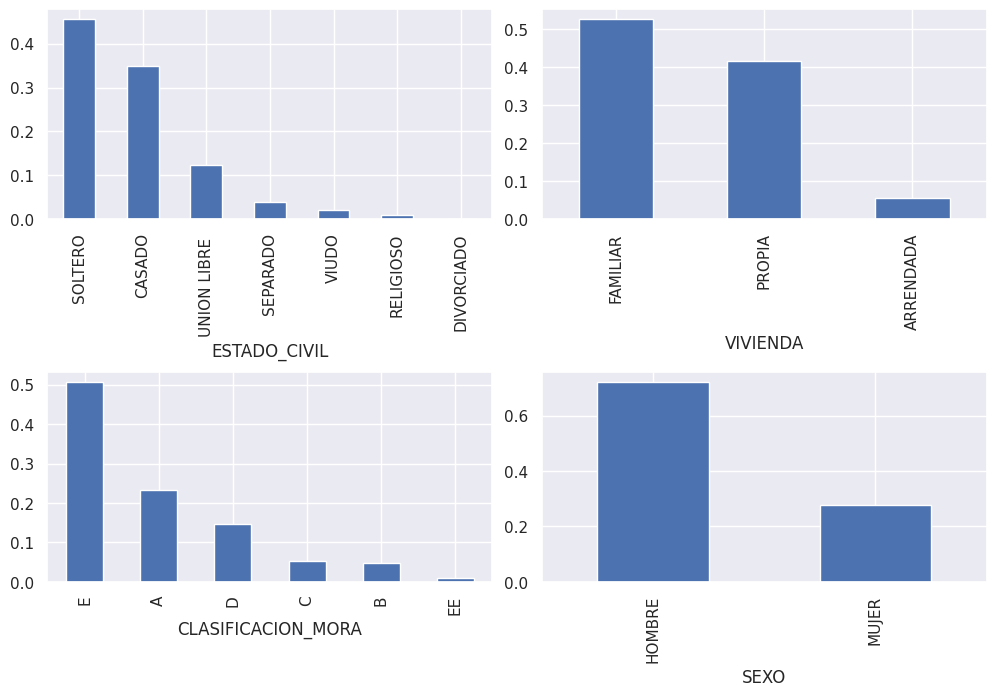

In [ ]:
plt.subplot(221)
df_clean.ESTADO_CIVIL.value_counts(normalize=True).plot(kind = 'bar',figsize=(10,7))
plt.tight_layout(pad=0.7)

plt.subplot(222)
df_clean.VIVIENDA.value_counts(normalize=True).plot(kind = 'bar')
plt.tight_layout(pad=0.7)

plt.subplot(223)
df_clean.CLASIFICACION_MORA.value_counts(normalize=True).plot(kind = 'bar')
plt.tight_layout(pad=0.7)

plt.subplot(224)
df_clean.SEXO.value_counts(normalize=True).plot(kind = 'bar')
plt.tight_layout(pad=0.7)

plt.show()



---


De las gráficas anteriores podemos concluir lo siguiente:


---


**SEXO:**


*   El 72.25% de los registros del df. corresponden a un cliente HOMBRE
*   El 27.74% de los registros del df. corresponden a un cliente MUJER


**TIPO DE VIVIENDA**


*   El 52.26% de los clientes del df. viven en casa familiar
*   El 41.79% de los clientes del df. viven en casa propia
*   El 5.58% de los clientes del df. viven en casa arrendada


**ESTADO CIVIL**


*   El 45.51% de los clientes son solteros
*   El 34.85% de los clientes son casados
*   El 12.35% de los clientes estan en unión libre
*   El 4.06% de los clientes son separados
*   El 2.03% de los clientes son viudos
*   El 1.01% de los clientes son religiosos
*   El 0.1692% de los clientes son divorciados


**CLASIFICACIÓN DE MORA**


*   El 1.01% de los clientes tienen calificación de mora muy alta (EE)
*   El 50.76% de los clientes tienen calificación de mora alta (E)
*   El 14.72% de los clientes tienen calificación de mora alta (D)
*   El 5.41% de los clientes tienen calificación de mora alta (C)
*   El 4.73% de los clientes tienen calificación de mora alta (B)
*   El 23.35% de los clientes tienen calificación de mora alta (A)


---
# GRAFICOS DE RESUMEN UNIVARIADOS

---




Estos gráficos ofrecen una descripción más concisa de la ubicación, dispersión y distribución de una variable que un gráfico enumerativo.








---


**HISTOGRAMAS**


---



Un histograma muestra la forma y la dispersión de datos de muestra continuos. También nos ayuda a comprender la asimetría y la curtosis de la distribución de los datos.

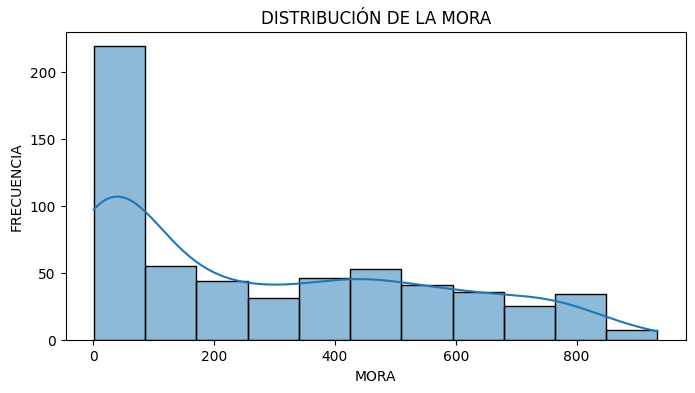

MORA
5      0.109983
36     0.037225
767    0.023689
97     0.023689
433    0.021997
         ...   
828    0.001692
251    0.001692
60     0.001692
471    0.001692
475    0.001692
Name: proportion, Length: 235, dtype: float64


<ipython-input-24-3bf1b7ddac20>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_clean.mora= df_clean.MORA.value_counts(normalize=True)


In [24]:
# Histograma de los dias de mora: muestra la distribución de la variable DIAS DE MORA dividiendola en intervalos, útil para ver la forma de distribución y frecuencia de los valores en cada intervalo

plt.figure(figsize=(8, 4))
sns.histplot(df_clean['MORA'].dropna(), kde=True)
plt.title('DISTRIBUCIÓN DE LA MORA')
plt.xlabel('MORA')
plt.ylabel('FRECUENCIA')
plt.show()

df_clean.mora= df_clean.MORA.value_counts(normalize=True)
print(df_clean.mora)


**Con el histograma podemos observar que la mayoria de clientes se encuentran en un rango de mora de 0 a 80 dias.**



---


**GRAFICA DE DENSIDAD**


---



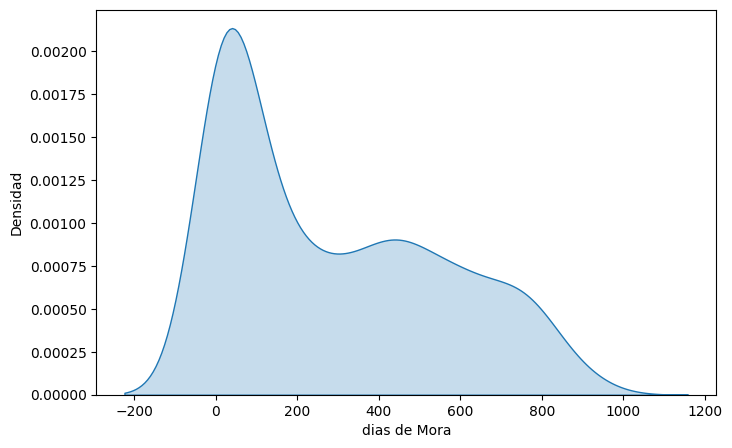

In [30]:
# El gráfico de densidad muestra la distribución de una variable continua

plt.figure(figsize=(8, 5))
sns.kdeplot(df_clean['MORA'], fill=True)
plt.xlabel('dias de Mora')
plt.ylabel('Densidad')
plt.show()



---


**DIAGRAMA DE CAJAS**


---



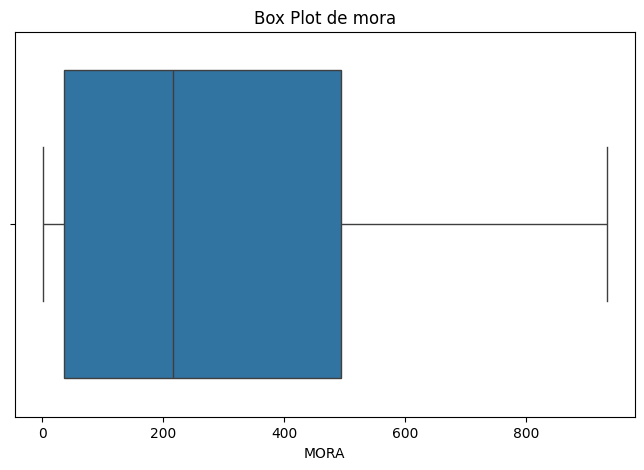

In [34]:
# Un diagrama de caja es una forma muy útil y estandarizada de mostrar la distribución de datos en función de un resumen de cinco números
# (mínimo, primer cuartil, segundo cuartil (mediana), tercer cuartil, máximo)
# Ayuda a comprender estos parámetros de la distribución de datos y es extremadamente útil para detectar valores atípicos

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['MORA'])
plt.title('Box Plot de mora')
plt.xlabel('MORA')
plt.show()



---


**TRAMAS DE VIOLIN**


---



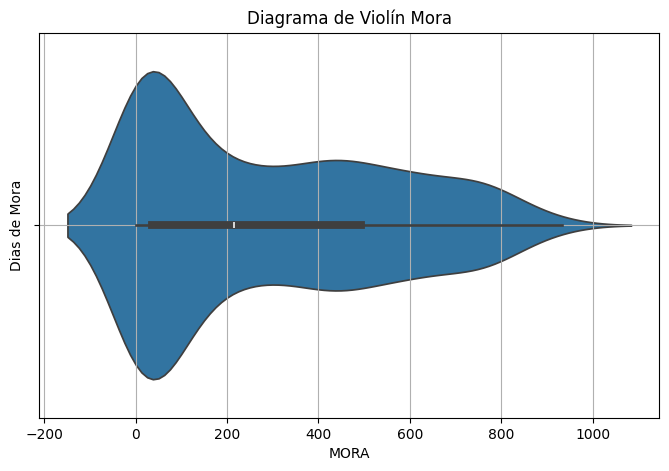

In [35]:

# Un diagrama de violín combina un histograma y un diagrama de caja para mostrar la distribución de los datos y su densidad

plt.figure(figsize=(8, 5))
sns.violinplot(x=df_clean['MORA'])
plt.title('Diagrama de Violín Mora')
plt.ylabel('Dias de Mora')
plt.grid(True)
plt.show()

*DISTRIBUCIÓN RELATIVA DE LOS VALORES UNICOS*



---

**Con este método obtenemos la distribución relativa de los valores unicos de las variables numéricas que fueron categorizadas para una mejor visualización y entendimiento.**


---



In [ ]:
df_edad= df.CATEGORIA_EDAD.value_counts(normalize=True)
print(df_edad)

df_ingresos= df.CATEGORIA_INGRESOS.value_counts(normalize=True)
print(df_ingresos)

df_egresos= df.CATEGORIA_EGRESOS.value_counts(normalize=True)
print(df_egresos)

df_dependientes= df.DEPENDIENTES.value_counts(normalize=True)
print(df_dependientes)

df_plazo= df.CATEGORIA_PLAZO.value_counts(normalize=True)
print(df_plazo)

df_saldo= df.CATEGORIA_SALDO.value_counts(normalize=True)
print(df_saldo)

df_mora= df.CATEGORIA_MORA.value_counts(normalize=True)
print(df_mora)


CATEGORIA_EDAD
segunda edad    0.803691
tercera edad    0.129195
primera edad    0.067114
Name: proportion, dtype: float64
CATEGORIA_INGRESOS
Medio    0.541946
Alto     0.303691
Bajo     0.154362
Name: proportion, dtype: float64
CATEGORIA_EGRESOS
Bajo     0.510067
Medio    0.375839
Alto     0.114094
Name: proportion, dtype: float64
DEPENDIENTES
0     0.909396
1     0.053691
2     0.026846
3     0.005034
4     0.001678
40    0.001678
99    0.001678
Name: proportion, dtype: float64
CATEGORIA_PLAZO
plazo alto     0.661074
plazo medio    0.333893
plazo bajo     0.005034
Name: proportion, dtype: float64
CATEGORIA_SALDO
saldo_alto     0.552013
saldo_medio    0.394295
saldo_bajo     0.053691
Name: proportion, dtype: float64
CATEGORIA_MORA
mora_alta     0.434564
mora_baja     0.395973
mora_media    0.169463
Name: proportion, dtype: float64




---

**En algunos casos, puede ser necesario establecer rango de valores a variables con muchos datos unicos para una mejor interpretación**

Creamos la gráfica de barras a cada una de las variables


---



(array([0, 1, 2]),
 [Text(0, 0, 'Media'), Text(1, 0, 'Alta'), Text(2, 0, 'Baja')])

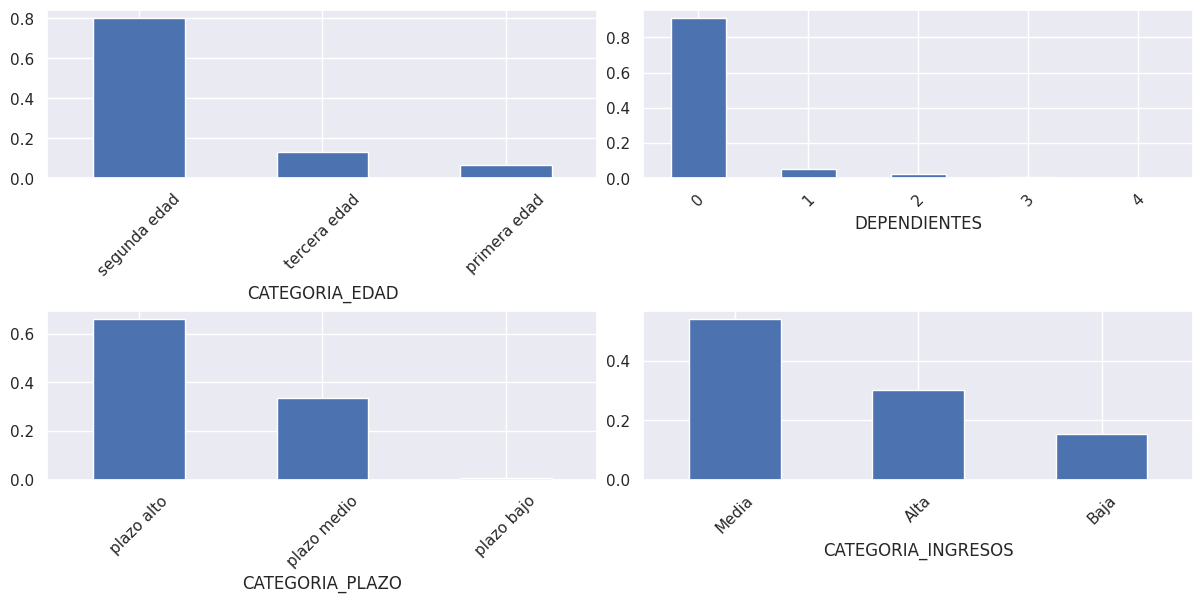

In [ ]:
plt.subplot(221)
df.CATEGORIA_EDAD.value_counts(normalize=True).plot(kind = 'bar',figsize=(12,6))
plt.tight_layout(pad=0.5)
plt.xticks(rotation=45)

plt.subplot(222)
df_clean.DEPENDIENTES.value_counts(normalize = True).plot(kind='bar')
plt.tight_layout(pad=0.5)
plt.xticks(rotation=45)

plt.subplot(223)
df.CATEGORIA_PLAZO.value_counts(normalize = True).plot(kind='bar')
plt.tight_layout(pad=0.5)
plt.xticks(rotation=45)

plt.subplot(224)
df.CATEGORIA_INGRESOS.value_counts(normalize = True).plot(kind='bar')
plt.tight_layout(pad=0.5)
plt.xticks(rotation=45)


(array([0, 1, 2]),
 [Text(0, 0, 'mora_alta'), Text(1, 0, 'mora_baja'), Text(2, 0, 'mora_media')])

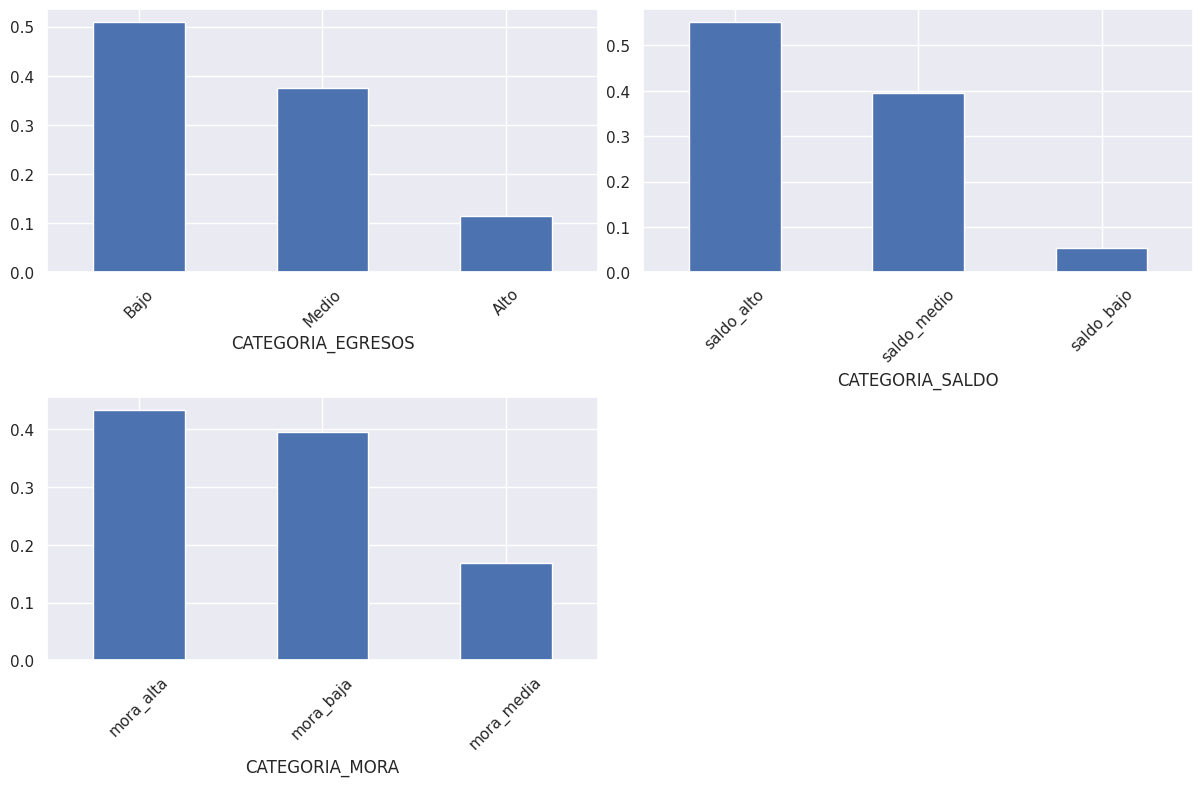

In [ ]:
plt.subplot(221)
df.CATEGORIA_EGRESOS.value_counts(normalize = True).plot(kind = 'bar',figsize=(12,8))
plt.tight_layout(pad=0.5)
plt.xticks(rotation=45)

plt.subplot(222)
df.CATEGORIA_SALDO.value_counts(normalize = True).plot(kind='bar')
plt.tight_layout(pad=0.5)
plt.xticks(rotation=45)

plt.subplot(223)
df.CATEGORIA_MORA.value_counts(normalize = True).plot(kind='bar')
plt.tight_layout(pad=0.5)
plt.xticks(rotation=45)



---

*De las gráficas anteriores podemos concluir lo siguiente:*


---



**CATEGORIA_EDAD:**

*   El 80.36% de los registros del df. corresponden a clientes de segunda edad  
*   El 12.91% de los registros del df. corresponden a clientes de tercera edad
*   El 6.71% de los registros del df. corresponden a clientes de primera edad

**CATEGORIA INGRESOS**

*   El 54.19% de los clientes del df. tienen ingreso medio
*   El 30.36% de los clientes del df. tienen ingreso alto
*   El 15.43% de los clientes del df. tienen ingreso bajo

**CATEGORIA EGRESOS**

*   El 51% de los clientes del df. tienen egreso bajo
*   El 37.58% de los clientes del df. tienen egreso medio
*   El 11.4% de los clientes del df. tienen egreso alto

**CATEGORIA DEPENDIENTES**

*   El 90.9% de los clientes del df. no tienen dependientes
*   El 5.36% de los clientes del df. tienen 1 dependiente
*   El 2.68% de los clientes del df. tienen 2 dependientes
*   El 0.5% de los clientes del df. tienen 3 dependientes
*   El 0.16% de los clientes del df. tienen 4 dependientes
*   El 0.16% de los clientes del df. tienen 40 dependientes  => atípico
*   El 0.16% de los clientes del df. tienen 99 dependientes  => atípico

**CATEGORIA PLAZO**

*   El 66.10% de los clientes del df. tienen plazo alto
*   El 33.38% de los clientes del df. tienen plazo medio
*   El 0.5% de los clientes del df. tienen plazo bajo

**CATEGORIA SALDO**

*   El 55.20% de los clientes del df. tienen saldo del credito alto
*   El 39.42% de los clientes del df. tienen saldo del credito medio
*   El 5.36% de los clientes del df. tienen saldo del credito bajo

**CATEGORIA MORA**

*   El 43.45% de los clientes del df. tienen mora alta
*   El 39.59% de los clientes del df. tienen mora baja
*   El 16.94% de los clientes del df. tienen mora media




---


# **GRAFICAS ENUMERATIVAS UNIVARIADAS**


---





---


**DIAGRAMA DE DISPERSIÓN**


---



<Axes: xlabel='None', ylabel='MORA'>

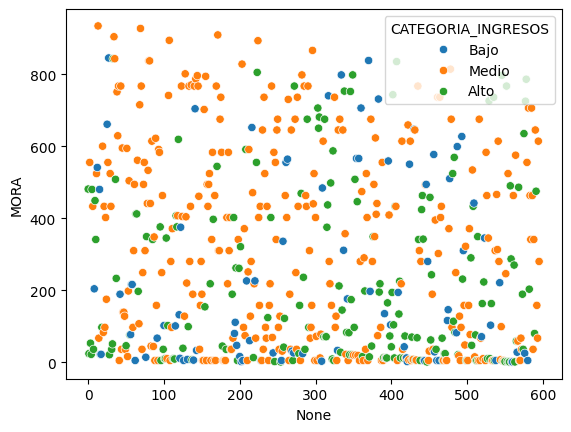

In [44]:
# Visualizamos la siguiente gráfica de dispersión considerando la categoria de ingresos
# Diferencia los valores de los datos por sus categorías y asigna diferentes colores según la variable de agrupación proporcionada como entrada

sns.scatterplot(x=df.index,y=df['MORA'],hue=df['CATEGORIA_INGRESOS'])


En la gráfica podemos ver como influyen los ingresos de los clientes con el estado de mora

***GRAFICO LINEAL (CON MARCADORES)***

<ipython-input-46-0c4554a83e29>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df.groupby('CATEGORIA_INGRESOS'):


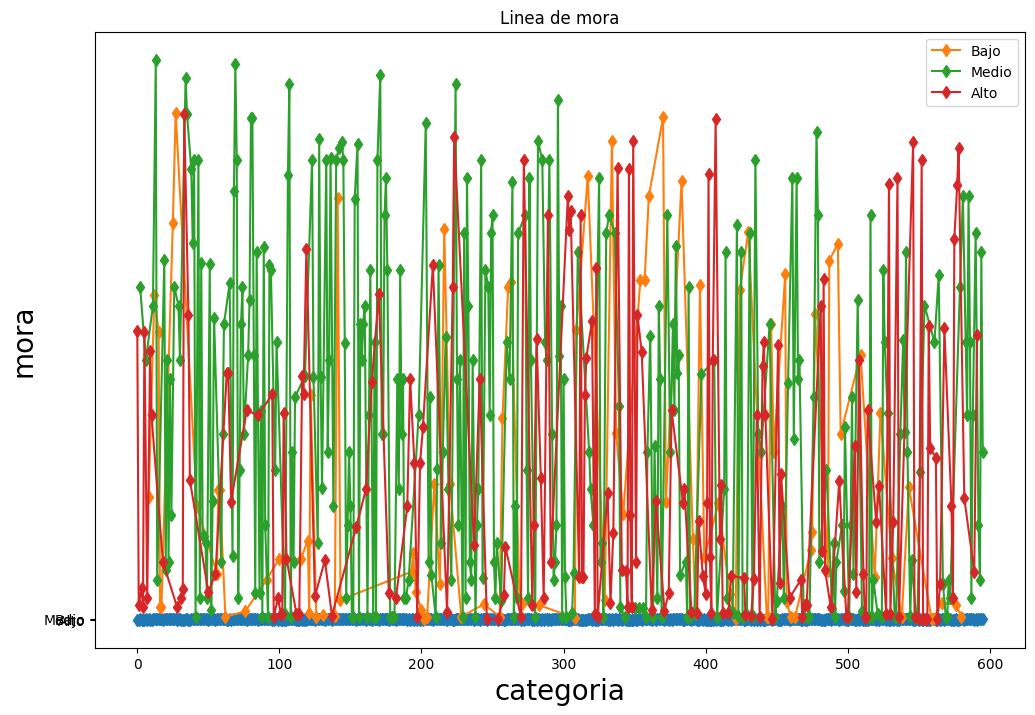

In [46]:
# visualiza los datos conectando los puntos de datos mediante segmentos de línea. Se parece a un gráfico de dispersión, pero se diferencia en que los puntos de medición están ordenados
# (normalmente por su valor en el eje x) y conectados con segmentos de línea recta.

plt.figure(figsize=(12,8))
plt.title('Linea de mora')
plt.xlabel('categoria',fontsize=20)
plt.ylabel('mora',fontsize=20)
plt.plot(df.index,df['CATEGORIA_INGRESOS'],markevery=1,marker='d')
for name, group in df.groupby('CATEGORIA_INGRESOS'):
    plt.plot(group.index, group['MORA'], label=name,markevery=1,marker='d')
plt.legend()
plt.show()



---

# CONCLUSIONES


---



Como resultado de cada una de las graficas utilizadas en nuestro analisis, podemos concluir que la mayoria de personas que se encuentran en mora son del genero MASCULINO, mas del 50% de los clientes en mora viven en casa familiar y predomina en la base de datos el estado civil soltero con mas del 45%. Mas del 80% de los clientes en mora tienen un rango de edad de los 31 a los 60 años, el 54% tienen un ingreso de 1'000.000 a 3'000.000 millones y el 51% tienen egresos bajos de 1'000.000 a 3'000.000, el 90% de los clientes no cuentan con dependientes. Hay un dato importante en el analisis y es que mas del 66% de clientes en mora aperturaron su crédito con un plazo mayor a 60 meses y el 55% solicitaron un credito alto superior a 50.000.000




